# Midterm Project

### Lindy Astl

How do I access the x, y, and z lists to plot? They are generated within the evolve function and are still set to the list of zeros as from the init...
    Did I do it right?
        
Are my plots good?
Also, 3D plot doesn't work

How do I create a test file?

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import csv

class Attractor(object):
    
    def __init__(self, s=10, p=(8/3), b=28, start=0.0, end=80.0, points=10000):
        self.s = s
        self.p = p
        self.b = b
        self.params = np.array([self.s, self.p, self.b])
        
        self.start = start
        self.end = end
        self.points = points
        
        #make sure dt is a value, not a list
        self.dt = (self.end - self.start) / self.points
        
        self.solution = []
        x0 = 0.0
        y0 = 0.0
        z0 = 1.0
        
        #generate arrays to commit values to and later plot
        self.t_list = np.linspace(self.start, self.end, self.points)
        self.x = np.zeros(self.points)
        self.y = np.zeros(self.points)
        self.z = np.zeros(self.points)
    
    def euler(self, r):
        
        x, y, z = r
        
        dx = (self.s * (y - x)) * self.dt
        dy = (x * (self.p - z) - y) * self.dt
        dz = ((x * y) - (self.b * z)) * self.dt 
        
        k1 = np.array([dx, dy, dz])
        
        return k1
    
       
    def rk2(self, r):
        x, y, z = r
        new_inc = self.dt/2
        
        #k1 = euler(r)
        #k2 = euler(t+dt*0.5,u+k1*0.5*dt)
        
        
        dx = (self.s * (y - x)) * self.dt
        dy = (x * (self.p - z) - y) * self.dt
        dz = ((x * y) - (self.b * z)) * self.dt
        
        dx2 = (self.s * (dy - dx)) * self.dt
        dy2 = (dx * (self.p - dz) - dy) * self.dt
        dz2 = ((dx * dy) - (self.b * dz)) * self.dt
        
        k2 = np.array([dx2, dy2, dz2]) 
        
        return k2
              
        
    def rk3(self, r):
        x, y, z = r
        new_inc = self.step/2
              
        dx = (self.s * (y - x)) * (self.step + new_inc) + (rk2(r)*new_inc)
        dy = (x * (self.p - z) - y) * (self.step + new_inc) + (rk2(r)*new_inc)
        dz = ((x * y) - (self.b * z)) * (self.step + new_inc) + (rk2(r)*new_inc)
        
        k3 = np.array([dx, dy, dz]) 
        
        return k3
              
    def rk4(self, r):
        x, y, z = r
        new_inc = self.step/2
              
        dx = (self.s * (y - x)) * (self.step + new_inc) + (rk3(r)*self.step)
        dy = (x * (self.p - z) - y) * (self.step + new_inc) + (rk3(r)*self.step)
        dz = ((x * y) - (self.b * z)) * (self.step + new_inc) + (rk3(r)*self.step)
        
        k4 = np.array([dx, dy, dz]) 
        
        return k4
              
        
    def evolve(self, r0, order = 4):
        x0, y0, z0 = r0
        
        if order == 1:
              inc = self.euler
        elif order == 2:
              inc = self.rk2
        elif order == 4:
              inc = self.rk4
        else:
              print "Incorrect input"
        #t = [t+i for _ in self.dt]
                   
        x[0] = x0
        y[0] = y0
        z[0] = z0
        
        for i in xrange(0, t_list.size-1):
            dx, dy, dz = inc(np.array([self.x[i], self.y[i], self.z[i]]))
            self.x[i+1] = self.x[i] + dx
            self.y[i+1] = self.y[i] + dy
            self.z[i+1] = self.z[i] + dz
        df = pd.DataFrame({'t': self.t_list, 'x': self.x, 'y': self.y, 'z': self.z})
        self.solution = df
        return self.solution
              
    
    def save(self):
        self.solution.to_csv('solution.csv')
        
    def plotx(self):
        plt.plot(self.t_list, self.evolve(r0)['x'])
        
    def ploty(self): 
        plt.plot(self.t_list, self.evolve(r0)['y'])
    
    def plotz(self):
        plt.plot(self.t_list, self.evolve(r0)['z']) 
              
    def plotxy(self):
        plt.plot(self.evolve(r0)['x'], self.evolve(r0)['y'])
              
    def plotyz(self):
        plt.plot(self.evolve(r0)['y'], self.evolve(r0)['z'])
              
    def plotzx(self):
        plt.plot(self.evolve(r0)['z'], self.evolve(r0)['x'])
    
    def plot3d(self):
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        Axes3D.plot(dx, dy, dz)#each being a list of values calculated from appropriate dt values
        plt.show()
        


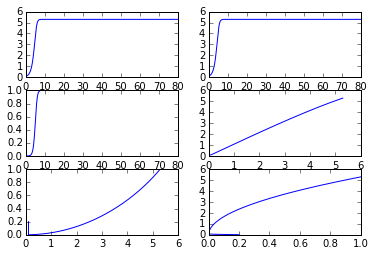

In [45]:
import numpy as np
s=10 
p=(8/3)
b=28
start=0.0
end=80.0
points=10000

params = np.array([s, p, b])
        
#make sure dt is a value, not a list
dt = (end - start) / points
solution = []
        
        #generate arrays to commit values to and later plot
t_list = np.linspace(start, end, points)
x = np.zeros(points)
y = np.zeros(points)
z = np.zeros(points)
    
def euler(r):
        
    x, y, z = r
        ###take note
        
    dx = (s * (y - x)) * dt
    dy = (x * (p - z) - y) * dt
    dz = ((x * y) - (b * z)) * dt 
        
    k1 = np.array([dx, dy, dz])
    return k1
    
def evolve(r0, order = 1):
    x0, y0, z0 = r0
    if order == 1:
          inc = euler(r0)
    else:
          print "Incorrect input"
        #t = [t+i for _ in self.dt]
                   
    x[0] = x0
    y[0] = y0        
    z[0] = z0
        
    for i in xrange(0, len(t_list)-1):
        dx, dy, dz = euler(np.array([x[i], y[i], z[i]]))
        x[i+1] = x[i] + dx
        y[i+1] = y[i] + dy
        z[i+1] = z[i] + dz
    df = pd.DataFrame({'t': t_list, 'x': x, 'y': y, 'z': z})
    solution = df
    solution.to_csv('solution.csv')
    return solution

#evolve([0.01, 0.1, 0.2])['x']


r0 = [0.01, 0.1, 0.2]
plt.subplot(3,2,1)
plt.plot(t_list, evolve(r0)['x'])
             
plt.subplot(3,2,2)
plt.plot(t_list, evolve(r0)['y'])

plt.subplot(3,2,3)
plt.plot(t_list, evolve(r0)['z']) 

plt.subplot(3,2,4)
plt.plot(evolve(r0)['x'], evolve(r0)['y'])

plt.subplot(3,2,5)
plt.plot(evolve(r0)['y'], evolve(r0)['z'])

plt.subplot(3,2,6)
plt.plot(evolve(r0)['z'], evolve(r0)['x'])

In [4]:
import numpy as np
from attractor import Attractor
a = Attractor()

t_list = np.linspace(0.0, 80.0, 10000)
#x = int(a.solution['x'].tolist())
#say x, y, z = [0.1, 0.0, 0.0]

dx = (10 * (0.0 - 0.1)) * t_list[0] + 0.1
dy = (0.1 * (28 - 0.0) - 0.0) * t_list[0] + 0.0
dz = ((0.1 * 0.0) - (8/3 * 0.0)) * t_list[0] + 0.0
ex_1 = np.array([dx, dy, dz])
    
dx2 = (10 * (dy - dx)) * t_list[1] + dx 
dy2 = (dx * (28.0 - dz) - dy) * t_list[1] + dy
dz2 = ((dx * dy) - (8/3 * dz)) * t_list[1] + dz
ex_2 = np.array([dx2, dy2, dz2])
    
dx3 = (10 * (dy2 - dx2)) * t_list[2] + dx2
dy3 = (dx2 * (28.0 - dz2) - dy2) * t_list[2] + dy2
dz3 = ((dx2 * dy2) - (8/3 * dz2)) * t_list[2] + dz2
ex_3 = np.array([dx3, dy3, dz3])
    
dx4 = (10 * (dy3 - dx3)) * t_list[3] + dx3
dy4 = (dx3 * (28 - dz3) - dy3) * t_list[3] + dy3
dz4 = ((dx3 * dy3) - (8/3 * dz3)) * t_list[3] + dz3
ex_4 = np.array([dx4, dy4, dz4])
    
dx5 = (10 * (dy4 - dx4)) * t_list[4] + dx4
dy5 = (dx4 * (28 - dz4) - dy4) * t_list[4] + dy4
dz5 = ((dx4 * dy4) - (8/3 * dz4)) * t_list[4] + dz4
ex_5 = np.array([dx5, dy5, dz5])

print "Actual increments: " + str(a.solution).strip('[]')
print "Expected increments: " + str([dx, dx2, dx3, dx4, dx5]).strip('[]')
#assert x[:5] == dx5[:5]

a.solution

Actual increments: 
Expected increments: 0.10000000000000001, 0.091999199919992003, 0.080862572705915459, 0.076638380534985728, 0.089264185284759379


[]

In [49]:
def evolve(r0, order = 1):
    x0, y0, z0 = r0
    if order == 1:
          inc = euler(r0)
    else:
          print "Incorrect input"
        #t = [t+i for _ in self.dt]
                   
    x[0] = x0
    y[0] = y0        
    z[0] = z0
        
    for i in xrange(0, len(t_list)-1):
        dx, dy, dz = euler(np.array([x[i], y[i], z[i]]))
        x[i+1] = x[i] + dx
        y[i+1] = y[i] + dy
        z[i+1] = z[i] + dz
    df = pd.DataFrame({'t': t_list, 'x': x, 'y': y, 'z': z})
    solution = df
    solution.to_csv('solution.csv')
    return solution
evolve([0.01, 0.1, 0.2])

,t,x,y,z
0,0.000000,0.010000,0.100000,0.200000
1,0.008001,0.017200,0.099344,0.155208
2,0.016002,0.023772,0.098803,0.120455
3,0.024002,0.029774,0.098370,0.093492
4,0.032003,0.035262,0.098037,0.072573
5,0.040004,0.040284,0.097797,0.056344
6,0.048005,0.044885,0.097641,0.043755
7,0.056006,0.049105,0.097562,0.033989
8,0.064006,0.052982,0.097554,0.026414
9,0.072007,0.056548,0.097610,0.020538
